# Objectives

1. Implement at least 2 algorithms that determine the Nth decimal digit of Pi in a programming language. (For ten you need to implement 3 algorithms)
2. Choose metrics for comparing algorithms
3. Perform empirical analysis of the proposed algorithms
4. Make a graphical presentation of the data obtained
5. Make a conclusion on the work done.


### Algorithms

Maclauren series, Gausse-Legendre algorithm, Monte Carlo method


## Implementation


## Setup


In [39]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../shared')
from decorators import *
from benchmarking import *


### Preparing the samples


In [40]:
from math import pi

### 1. Implement the algorithms listed below in a programming language (python)


The Maclaurin series can be used to find PI with any desired precision, with the knowledge that π = 4 arctan(1). The Maclaurin series for arctan(x) is:
![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/a64209fea45287c3b62a80a127c651f62b904585)

The Gauss-Legendre algorithm is an iterative algorithm that uses the arithmetic-geometric mean (AGM) to calculate pi.

And the Monte Carlo method is:

`pi = 4 * (number of points where x^2 + y^2 <1) / (total number of points)`

In [41]:
from math import sqrt
import random
random.seed(42)

def maclauren_pi(n: int) -> float:
    pi_approx = 0.0
    k = 0
    while True:
        pi_approx += ((-1) ** k) / (2 * k + 1)
        k += 1
        if round(pi_approx * 4, n) == round(pi, n):
            return pi_approx * 4


def gauss_legendre_pi_digits(n: int) -> float:
    a = 1.0
    b = 1.0 / sqrt(2)
    t = 1.0 / 4.0
    p = 1.0
    pi_approx_old = 0.0
    while True:
        a_new = (a + b) / 2
        b_new = sqrt(a * b)
        t_new = t - p * (a - a_new) ** 2
        p_new = 2 * p
        a = a_new
        b = b_new
        t = t_new
        p = p_new
        pi_approx = (a + b) ** 2 / (4 * t)
        if round(pi_approx, n) == round(pi_approx_old, n):
            return pi_approx
        pi_approx_old = pi_approx


def monte_carlo_pi(n: int) -> float:
    in_circle = 0
    total = 0
    while True:
        x = random.random()
        y = random.random()
        if x ** 2 + y ** 2 <= 1:
            in_circle += 1
        total += 1
        pi_approx = 4 * in_circle / total
        if round(pi_approx, n) == round(pi, n):
            return pi_approx

The input set is just going to be numbers from 2 to 8. The comparison will be made on the time it takes to compute the Nth digit of pi.

In [46]:
algorithms= [maclauren_pi, gauss_legendre_pi_digits, monte_carlo_pi]

dataset = list(range(2, 9))

### 3. Choose metrics for comparing algorithms

The metric that will be used for comparing the algorithms is running time.


### 4. Perform empirical analysis of the proposed algorithms

The utility functions defined in the previous laboratories will be used to benchmark the running time of the algorithms.


In [47]:
results = benchmark_single_thread(algorithms, dataset)


In [48]:
# print table
import pandas as pd

df = pd.DataFrame(results.values(), index=results.keys(), columns=dataset)

print(df)

                               2       3        4         5          6  \
maclauren_pi              0.1577  1.0332  16.2352  125.2115  1134.6591   
gauss_legendre_pi_digits  0.0104  0.0044   0.0036    0.0036     0.0036   
monte_carlo_pi            0.0386  0.3028   0.4018   43.3162    79.1198   

                                   7            8  
maclauren_pi              12190.9629  141134.6034  
gauss_legendre_pi_digits      0.0054       0.0038  
monte_carlo_pi               46.4523    1417.4603  


### 5. Make a graphical presentation of the data obtained

The following chart show the running time of each algorithm on the chosen graphs.

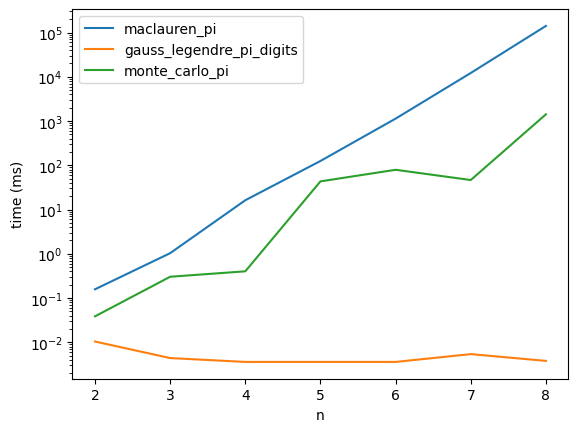

In [49]:
plot_results(results, dataset, "pi precision digits")

The rest of the source code can be accessed publicly on GitHub: [https://github.com/prenaissance/labs-2022](https://github.com/prenaissance/labs-2022) 

# Conclusion

In this laboratory work, I compared the efficiency of 3 algorithms for approximating PI. The algorithms were implemented in Python and the running time was measured using the timeit module. The algorithms measured were Maclaurin series, Gauss-Legendre algorithm and Monte Carlo method.

Although the Maclauren series algorithm is well known and is easy to implement and proof, it has a very low rate of convergence. The Gauss-Legendre algorithm is more complex to implement, but it is leagues ahead of the other algorithms.

The Monte Carlo method is the easiest to implement, and the running time, unexpectedly, is not the worst of the three. However, due to the randomness, the accuracy is not guaranteed and an error margin is required.